<a href="https://colab.research.google.com/github/eledesma/EstadisticaICESI/blob/main/SEGUNDO_SESI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

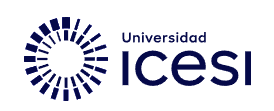

#<big><big> Fundamentos de Estadística</big></big><br><small>

**Facultad de Ingeniería / Escuela de diseño, Ingenieria y Ciencias Aplicadas**

### Certificación</small><br><small>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis
import altair as alt




**Contexto:**

Imaginemos que somos profesores de un curso de Fundamentos de Estadística en una universidad. Queremos analizar el rendimiento de nuestros estudiantes en el examen final. Para ello, generamos un conjunto de datos aleatorios que representa las notas de 100 estudiantes. Las notas se simulan utilizando una distribución normal con una media de 70 y una desviación estándar de 10.



In [ ]:
# Generar datos aleatorios de notas
np.random.seed(0)  # Para reproducibilidad
notas = np.random.normal(loc=70, scale=10, size=100)

In [ ]:
notas

array([87.64052346, 74.00157208, 79.78737984, 92.40893199, 88.6755799 ,
       60.2272212 , 79.50088418, 68.48642792, 68.96781148, 74.10598502,
       71.44043571, 84.54273507, 77.61037725, 71.21675016, 74.43863233,
       73.33674327, 84.94079073, 67.94841736, 73.13067702, 61.45904261,
       44.47010184, 76.53618595, 78.64436199, 62.5783498 , 92.69754624,
       55.45634325, 70.45758517, 68.1281615 , 85.32779214, 84.6935877 ,
       71.54947426, 73.7816252 , 61.12214252, 50.19203532, 66.52087851,
       71.56348969, 82.30290681, 82.02379849, 66.12673183, 66.97697249,
       59.51447035, 55.79982063, 52.93729809, 89.50775395, 64.90347818,
       65.61925698, 57.4720464 , 77.77490356, 53.86102152, 67.8725972 ,
       61.04533439, 73.86902498, 64.89194862, 58.19367816, 69.71817772,
       74.28331871, 70.66517222, 73.02471898, 63.65677906, 66.37258834,
       63.27539552, 66.40446838, 61.86853718, 52.73717398, 71.77426142,
       65.98219064, 53.69801653, 74.62782256, 60.92701636, 70.51

In [ ]:
# Cálculo de la media
media = np.mean(notas)
print(f'Media: {media}')

# Cálculo de la mediana
mediana = np.median(notas)
print(f'Mediana: {mediana}')

# Cálculo de la moda
notas_df = pd.DataFrame({'notas': notas})
moda = notas_df['notas'].mode()[0]
print(f'Moda: {moda}')

# Cálculo de la desviación estándar
desviacion_estandar = np.std(notas)
print(f'Desviación estándar: {desviacion_estandar}')

# Cálculo de la asimetría
asimetria = skew(notas)
print(f'Asimetría: {asimetria}')

# Cálculo de la curtosis
curtosis_ = kurtosis(notas)
print(f'Curtosis: {curtosis_}')



Media: 70.59808015534485
Mediana: 70.94096119437998
Moda: 44.470101841659215
Desviación estándar: 10.078822447165797
Asimetría: 0.005171839713551247
Curtosis: -0.37835455663313367


In [ ]:
# Gráfica de la distribución de las notas
chart = alt.Chart(notas_df).mark_bar().encode(
    alt.X('notas:Q', bin=True),
    y='count()',
    tooltip=[alt.Tooltip('notas:Q', bin=True), 'count()']
).properties(
    title='Distribución de las notas del examen final de Estadística'
).interactive()

chart.save('distribucion_notas.json')

In [ ]:
chart

alt.Chart(...)

In [ ]:
# Gráfica de la distribución de las notas
chart = alt.Chart(notas_df).mark_bar().encode(
    alt.X('notas:Q', bin=True),
    y='count()',
    tooltip=[alt.Tooltip('notas:Q', bin=True), 'count()']
).properties(
    title='Distribución de las notas del examen final de Estadística'
)

# Añadir la línea de la distribución normal
normal_dist = alt.Chart(notas_df).transform_density(
    'notas',
    as_=['notas', 'density'],
    steps=200
).mark_line(color='red').encode(
    x='notas:Q',
    y='density:Q'
)

# Añadir la línea de la media
mean_line = alt.Chart(pd.DataFrame({'x': [media]})).mark_rule(color='green').encode(
    x='x',
    tooltip=[alt.Tooltip('x', title='Media')]
)

# Añadir la línea de la mediana
median_line = alt.Chart(pd.DataFrame({'x': [mediana]})).mark_rule(color='blue').encode(
    x='x',
    tooltip=[alt.Tooltip('x', title='Mediana')]
)

# Combinar las gráficas
chart_final = chart + normal_dist + mean_line + median_line

chart_final.save('distribucion_notas_con_lineas.json')

In [ ]:
chart_final

alt.LayerChart(...)

In [ ]:
# Cálculo de los deciles
deciles = np.percentile(notas, np.arange(10, 100, 10))
print(f'Deciles: {deciles}')

# Gráfico de caja (boxplot)
chart = alt.Chart(pd.DataFrame({'notas': notas})).mark_boxplot().encode(
    y='notas:Q'
).properties(
    title='Boxplot de las notas del examen final de Estadística'
)

# Añadir marcadores para los deciles
for i, decil in enumerate(deciles):
    chart += alt.Chart(pd.DataFrame({'y': [decil]})).mark_rule(color='red').encode(
        y='y',
        tooltip=[alt.Tooltip('y', title=f'Decil {i+1}')]
    )

# Mostrar la gráfica
chart.interactive().save('boxplot_notas.json')

Deciles: [57.63377226 61.42563979 65.86353847 68.05626384 70.94096119 73.21310352
 74.4953894  79.55398541 84.71248112]


In [ ]:
chart

alt.LayerChart(...)

# Ahora tu

## Contexto:

Imagina que eres un analista de datos en una empresa de videojuegos. Tu trabajo es analizar el comportamiento de los jugadores en un nuevo juego que se ha lanzado recientemente.  Tienes acceso a un conjunto de datos que contiene información sobre el tiempo de juego (en horas) de 1000 jugadores durante su primera semana de juego.

**Tarea:**

Generación de datos: Genera un conjunto de datos aleatorios que represente el tiempo de juego de los 1000 jugadores. Puedes usar una distribución normal con una media de 15 horas y una desviación estándar de 5 horas.

Cálculo de medidas estadísticas: Calcula las siguientes medidas estadísticas para el conjunto de datos generado:

* Media
* Mediana
* Moda
* Desviación estándar
* Asimetría
* Curtosis
* Deciles (10%, 20%, ..., 90%)


**Visualización de datos:** Crea las siguientes visualizaciones para el conjunto de datos:

* Histograma de la distribución del tiempo de juego con la línea de la distribución normal, la línea de la media y la línea de la mediana.
* Boxplot del tiempo de juego con marcadores para cada decil.

**Interpretación de resultados:**

Interpreta cada una de las medidas estadísticas calculadas en el contexto del problema.

1. ¿Qué te dicen estas medidas sobre el comportamiento de los jugadores?
Describe la forma de la distribución del tiempo de juego. ¿Es simétrica? 2. ¿Está sesgada? ¿Qué indica la curtosis sobre la distribución?
3. Analiza el boxplot. ¿Hay valores atípicos? ¿Cómo se distribuyen los datos en los diferentes deciles?
4. ¿Qué conclusiones puedes sacar sobre el tiempo de juego de los jugadores en su primera semana? ¿Hay algún patrón interesante?